## EDA

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Loading our dataset
car_sales = pd.read_csv('data/car_sales.csv')

In [3]:
type(car_sales)

pandas.core.frame.DataFrame

In [4]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [6]:
car_sales.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [7]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [8]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [9]:
car_sales.dropna(subset=['Price'], inplace=True)

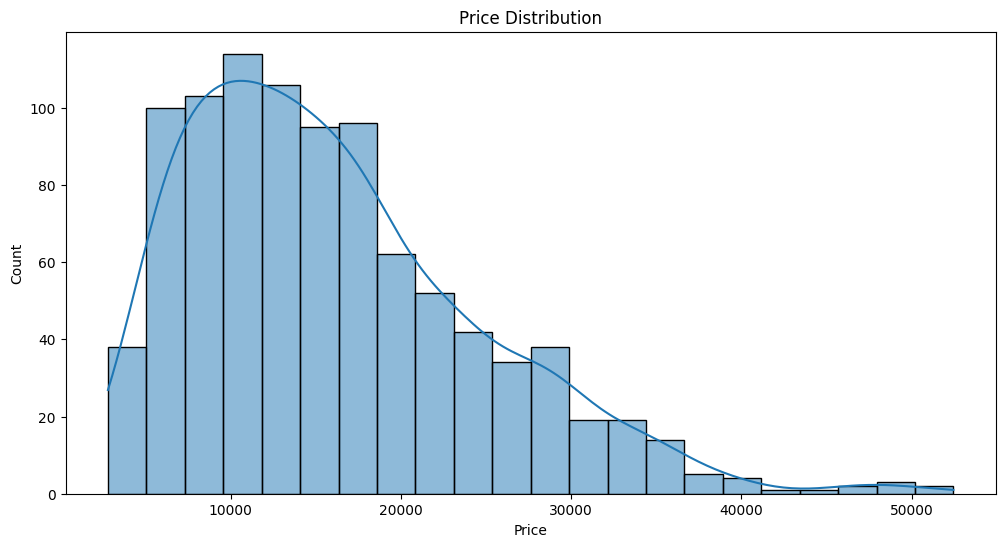

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(car_sales['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

## Data Preprocessing

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [12]:
categorical_features = ['Make', 'Colour']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
numerical_features = ['Odometer (KM)']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [14]:
# Define Doors features
door_feature = ["Doors"]

# Create Doors transformer Pipeline
door_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to 4
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [15]:
# Data preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
        ('door', door_transformer, door_feature)
])

## Model Building + Evaluation (Default Metrics)

In [16]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((760, 4), (760,), (190, 4), (190,))

In [19]:
# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

# Import SVR from sklearn's svm module
from sklearn.svm import SVR

# Import RandomForestRegressor from sklearn's ensemble module
from sklearn.ensemble import RandomForestRegressor

In [20]:
# Create dictionary of model instances, there should be 4 total key, value pairs
# in the form {"model_name": model_instance}.
# Don't forget there's two versions of SVR, one with a "linear" kernel and the
# other with kernel set to "rbf".

regression_models = {
    'Ridge' : Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge()),
    ]),
    'SVR_linear' : Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', SVR(kernel='linear'))
    ]),
    'SVR_rbf' : Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', SVR(kernel='rbf'))
    ]),
    'RandomForestRegressor' : Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])
}

results = {}

In [21]:
np.random.seed(42)

for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

{'Ridge': 0.254026110579439,
 'SVR_linear': -0.489452821008145,
 'SVR_rbf': 0.0018546241516633755,
 'RandomForestRegressor': 0.21496630886372015}

## Evaluating Ridge Regression Model With Other Metrics

In [22]:
# Import mean_absolute_error from sklearn's metrics module
###
from sklearn.metrics import mean_absolute_error

# Import mean_squared_error from sklearn's metrics module
###
from sklearn.metrics import mean_squared_error

# Import r2_score from sklearn's metrics module
###
from sklearn.metrics import r2_score

In [23]:
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_pipeline.fit(X_train, y_train)

y_preds = ridge_pipeline.predict(X_test)
y_preds[:50]

array([18514.480873  , 22204.86580267, 11045.72092225,  6891.87687957,
        8793.93970278, 10926.96786577, 15267.76229871, 13834.80312146,
       20207.44377898, 14412.59968701,  6216.01228306, 16543.06707068,
       11783.69374936, 13492.13284255, 14321.17899086, 16425.45131776,
       15999.88230172,  9925.04252351, 11576.64865889, 11580.55130633,
       10647.22402588, 13113.54464064, 17874.90033257, 23447.29246732,
       11797.33019118, 14481.85336505, 18430.527126  , 14680.33044208,
       20585.63901269, 19953.91395769, 18163.1170151 , 22366.43390174,
       12435.69707467, 14265.25495748, 18351.62656383, 19564.58267503,
       12213.05747919, 12479.20772529, 18677.93478691, 11284.89072638,
       15278.54001605, 17378.81425165, 19247.77623181, 17343.90692672,
       15048.12797569, 12724.44477165, 12389.86021752,  8475.63778401,
       15255.49324105, 18602.79970861])

In [24]:
regression_metrics = {
    'MSE' : mean_squared_error(y_test,y_preds),
    'MAE' : mean_absolute_error(y_test, y_preds),
    'R2S' : r2_score(y_test, y_preds)
}

for model_name, model_score in regression_metrics.items():
    print(f'{model_name} : {model_score}')

MSE : 49950182.63337458
MAE : 5713.821520855156
R2S : 0.254026110579439


In [25]:
mse = mean_squared_error(y_test, y_preds)
mse

49950182.63337458

In [26]:
mae = mean_absolute_error(y_test, y_preds)
mae

5713.821520855156

In [27]:
r2s = r2_score(y_test, y_preds)
r2s

0.254026110579439

## Hyperparameter Tuning

### Ridge Tuning

In [28]:
# Ridge Hyperparameters

from scipy.stats import uniform
ridge_param_dist = {
    'regressor__alpha': uniform(loc=0.01, scale=10)  # alpha from 0.01 to 10.01 (continuous uniform)
}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

ridge_rf = RandomizedSearchCV(estimator=ridge_pipeline,
                              param_distributions=ridge_param_dist,
                              n_iter=100,
                              cv=5,
                              verbose=True,
                              n_jobs=1,
                              random_state=42)

ridge_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,estimator,"Pipeline(step...r', Ridge())])"
,param_distributions,{'regressor__alpha': <scipy.stats....x7f2eb1906660>}
,n_iter,100
,scoring,None
,n_jobs,1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [30]:
ridge_rf.best_params_

{'regressor__alpha': np.float64(6.8523302651215685)}

In [31]:
ridge_rf.score(X_test, y_test)

0.25568738807478264

In [32]:
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=6.8523302651215685))
])

ridge_pipeline.fit(X_train, y_train)
ridge_pipeline.score(X_test, y_test)

0.25568738807478264